In [1]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2


In [2]:
from tensorflow.keras.utils import img_to_array

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

In [4]:
train_images = "C:\\Users\\ril\\Downloads\\pneumonia\\chest_xray\\train"

In [5]:
out_img="D:\\deep learning\\chestxray output.jpg"

In [6]:
train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [8]:
train_generator.classes.shape

(5216,)

In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory("C:\\Users\\ril\\Downloads\\pneumonia\\chest_xray\\val",
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 16 images belonging to 2 classes.


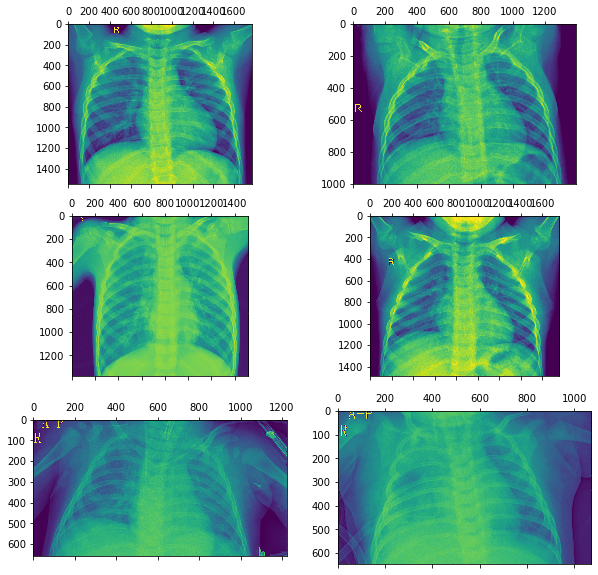

In [10]:
#Pneumonia
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[41]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))
plot5.matshow(plt.imread(train_generator.filepaths[2679]))
plot6.matshow(plt.imread(train_generator.filepaths[2710]))

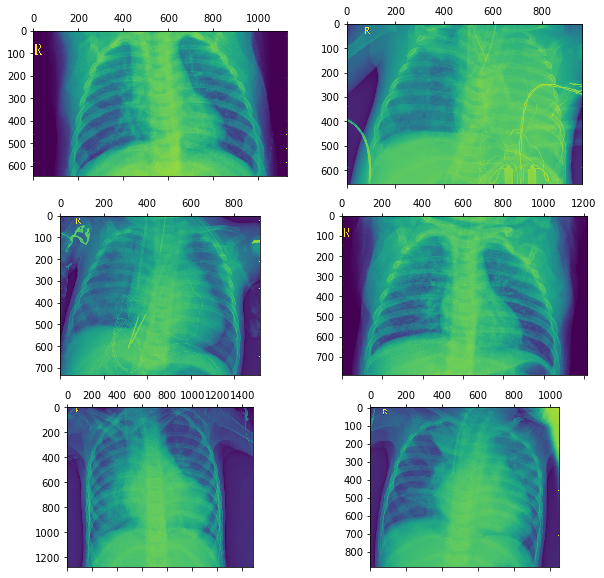

In [11]:
#Normal
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[1419]))
plot2.matshow(plt.imread(train_generator.filepaths[1365]))
plot3.matshow(plt.imread(train_generator.filepaths[1400]))
plot4.matshow(plt.imread(train_generator.filepaths[1350]))
plot5.matshow(plt.imread(train_generator.filepaths[1345]))
plot6.matshow(plt.imread(train_generator.filepaths[1349]))

In [12]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [13]:
history = model.fit(train_generator, epochs = 2, validation_data = validation_generator)

Epoch 1/2
41/41 [==============================] - 1556s 36s/step - loss: 0.5566 - accuracy: 0.7456 - val_loss: 0.9284 - val_accuracy: 0.6875
Epoch 2/2
41/41 [==============================] - 911s 22s/step - loss: 0.2993 - accuracy: 0.8806 - val_loss: 0.4836 - val_accuracy: 0.8125


1/1 [==============================] - 4s 4s/step
predicted class is : [[0.3885854 ]
 [0.968724  ]
 [0.99926335]
 [0.9026207 ]
 [0.9497428 ]
 [0.07038245]
 [0.84997827]
 [0.97373414]
 [0.15051234]
 [0.9450614 ]
 [0.22871126]
 [0.97295743]
 [0.954247  ]
 [0.36310416]
 [0.7840654 ]
 [0.54022634]]


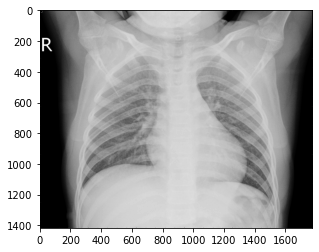

In [14]:
pre=model.predict(validation_generator.__getitem__(0)[0])
print('predicted class is : {}'.format(pre))
img = plt.imread(validation_generator.filepaths[0])
plt.imshow(img, cmap='gray')

In [31]:
x_train,y_train=next(train_generator)
x_test,y_test=next(test_generator)

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [16]:
eval_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = eval_datagen.flow_from_directory(
    "C:\\Users\\ril\\Downloads\\pneumonia\\chest_xray\\test",
    target_size = (300, 300),
    batch_size = 128, 
    class_mode = 'binary'
)

eval_result = model.evaluate_generator(test_generator, 624)
print('loss :', eval_result[0])
print('accuracy :', eval_result[1])

Found 624 images belonging to 2 classes.


<ipython-input-16-d0d14cef6305>:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result = model.evaluate_generator(test_generator, 624)


loss : 0.35785701870918274
accuracy : 0.8429487347602844


In [19]:
img= cv2.imread('C:\\Users\\ril\\Downloads\\pneumonia\\chest_xray\\test\\NORMAL\\IM-0017-0001.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)

1/1 [==============================] - 0s 120ms/step


array([[0.22263244]], dtype=float32)

1/1 [==============================] - 0s 119ms/step
Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

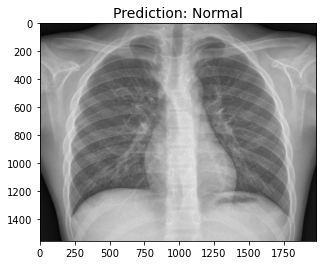

In [20]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

In [21]:
from lime import lime_image
import time

In [22]:
explainer = lime_image.LimeImageExplainer()

In [28]:
explanation = explainer.explain_instance(validation_generator.__getitem__(0)[0][11].astype('double'), model.predict, top_labels=1, hide_color=0, num_samples=1000)

1/1 [==============================] - 0s 135ms/step



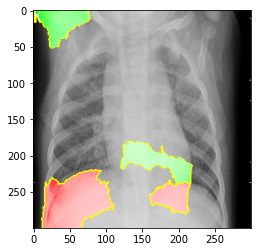

In [24]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

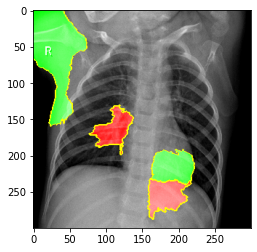

In [26]:
temp1, mask1= explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp1, mask1))

(-0.5, 299.5, 299.5, -0.5)

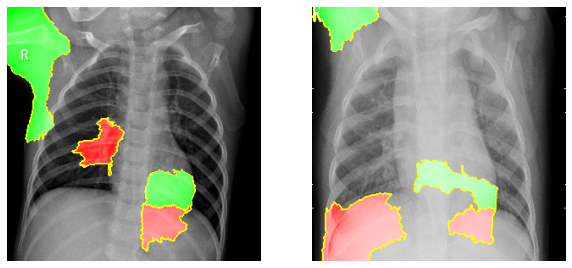

In [27]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
ax1.imshow(mark_boundaries(temp1, mask1))
ax2.imshow(mark_boundaries(temp, mask))
ax1.axis('off')
ax2.axis('off')

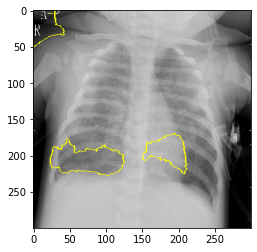

In [29]:
temp2, mask2= explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp2, mask2))

In [41]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 20, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:3])

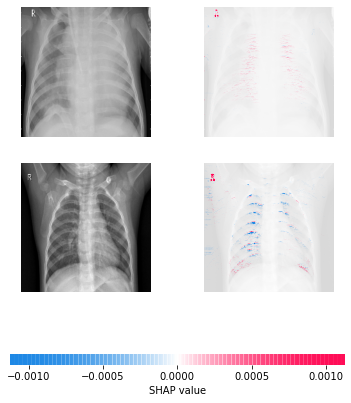

In [43]:
# plot the feature attributions
shap.image_plot(shap_values, x_test[1:3])

In [44]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer = lime_image.LimeImageExplainer(verbose = False)
segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

In [45]:
%%time
explanation = explainer.explain_instance(validation_generator.__getitem__(0)[0][1].astype('double'), 
                                         classifier_fn = model.predict, 
                                         top_labels=1, hide_color=0, num_samples=5000, segmentation_fn=segmenter)

1/1 [==============================] - 0s 125ms/step

Wall time: 6min 7s


In [47]:
from skimage.color import gray2rgb, rgb2gray, label2rgb

Text(0.5, 1.0, 'Positive/Negative Regions for 0')

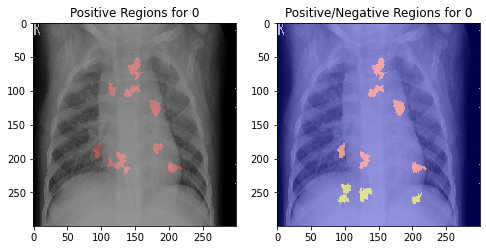

In [48]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(explanation.top_labels[0]))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False, min_weight = 0.01)
ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(explanation.top_labels[0]))